---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-social-network-analysis/resources/yPcBs) course resource._

---

# Assignment 1 - Creating and Manipulating Graphs

Eight employees at a small company were asked to choose 3 movies that they would most enjoy watching for the upcoming company movie night. These choices are stored in the file `Employee_Movie_Choices.txt`.

A second file, `Employee_Relationships.txt`, has data on the relationships between different coworkers. 

The relationship score has value of `-100` (Enemies) to `+100` (Best Friends). A value of zero means the two employees haven't interacted or are indifferent.

Both files are tab delimited.

In [2]:
import networkx as nx
import pandas as pd
import numpy as np
from networkx.algorithms import bipartite


# This is the set of employees
employees = set(['Pablo',
                 'Lee',
                 'Georgia',
                 'Vincent',
                 'Andy',
                 'Frida',
                 'Joan',
                 'Claude'])

# This is the set of movies
movies = set(['The Shawshank Redemption',
              'Forrest Gump',
              'The Matrix',
              'Anaconda',
              'The Social Network',
              'The Godfather',
              'Monty Python and the Holy Grail',
              'Snakes on a Plane',
              'Kung Fu Panda',
              'The Dark Knight',
              'Mean Girls'])


# you can use the following function to plot graphs
# make sure to comment it out before submitting to the autograder
def plot_graph(G, weight_name=None):
    '''
    G: a networkx G
    weight_name: name of the attribute for plotting edge weights (if G is weighted)
    '''
    %matplotlib notebook
    import matplotlib.pyplot as plt
    
    plt.figure()
    pos = nx.spring_layout(G)
    edges = G.edges()
    weights = None
    
    if weight_name:
        weights = [int(G[u][v][weight_name]) for u,v in edges]
        labels = nx.get_edge_attributes(G,weight_name)
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
        nx.draw_networkx(G, pos, edges=edges, width=weights);
    else:
        nx.draw_networkx(G, pos, edges=edges);

### Question 1

Using NetworkX, load in the bipartite graph from `Employee_Movie_Choices.txt` and return that graph.

*This function should return a networkx graph with 19 nodes and 24 edges*

<IPython.core.display.Javascript object>


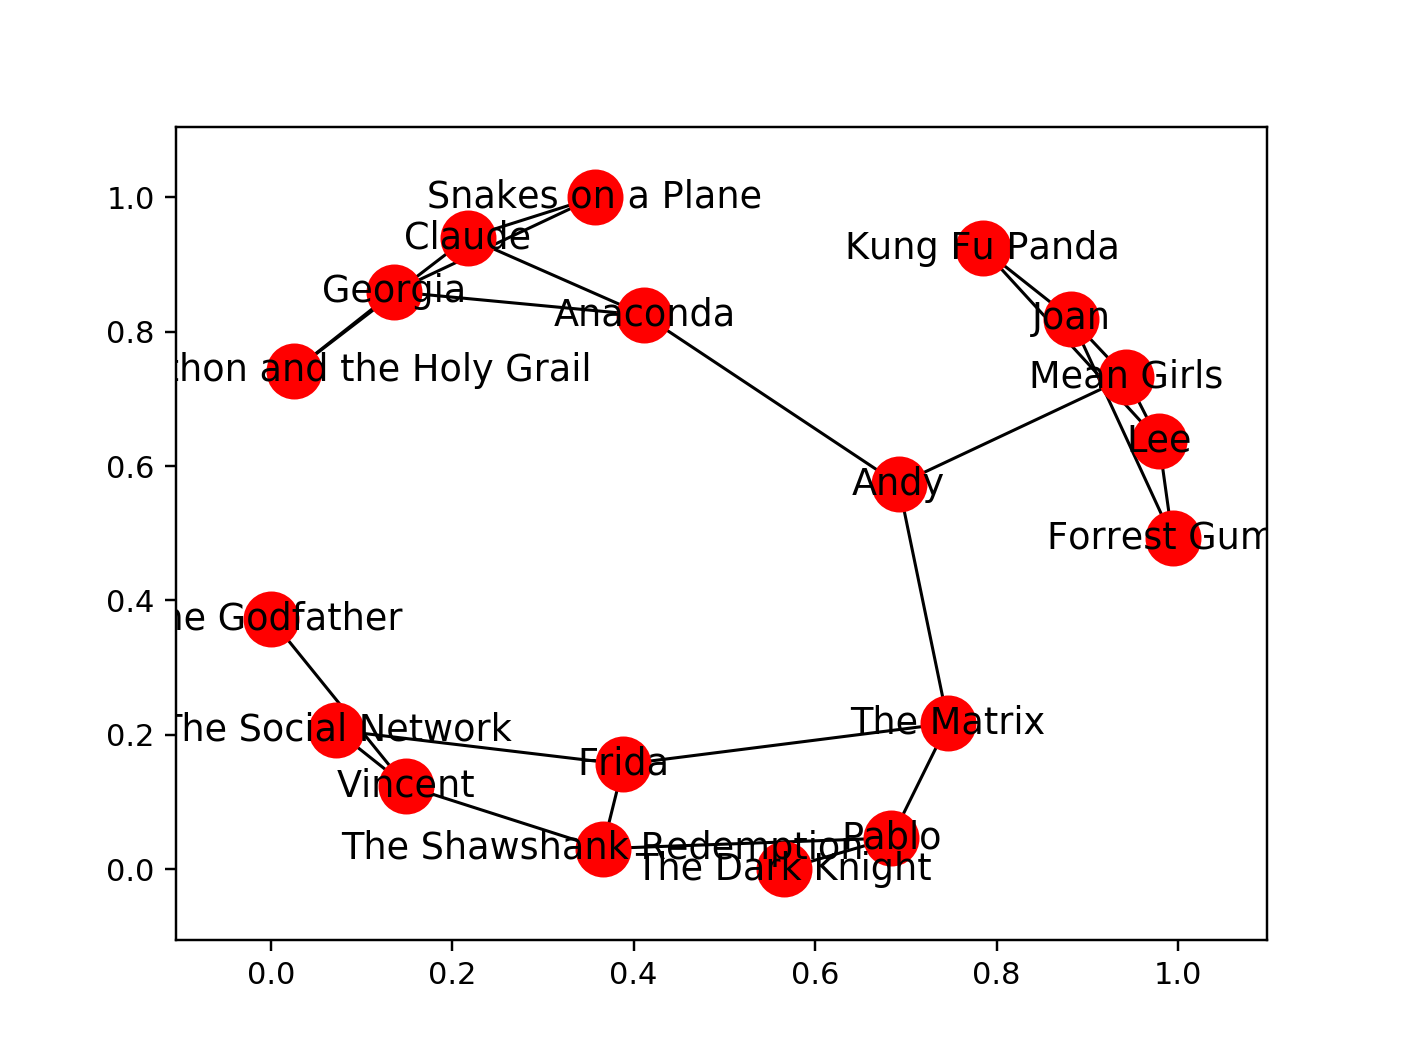

In [4]:
def answer_one():
        
    # Your Code Here
    
    B = nx.Graph()
    df_choices = pd.read_csv('Employee_Movie_Choices.txt', delimiter = "\t")
    B.add_nodes_from(df_choices['#Employee'], bipartite=0)
    B.add_nodes_from(df_choices['Movie'], bipartite=1)
    edges = [tuple(x) for x in df_choices[['#Employee','Movie']].values.tolist()]
    B.add_edges_from(edges, label='votes')
    
    return  B # Your Answer Here
# answer_one()
# plot_graph(answer_one())

### Question 2

Using the graph from the previous question, add nodes attributes named `'type'` where movies have the value `'movie'` and employees have the value `'employee'` and return that graph.

*This function should return a networkx graph with node attributes `{'type': 'movie'}` or `{'type': 'employee'}`*

<IPython.core.display.Javascript object>


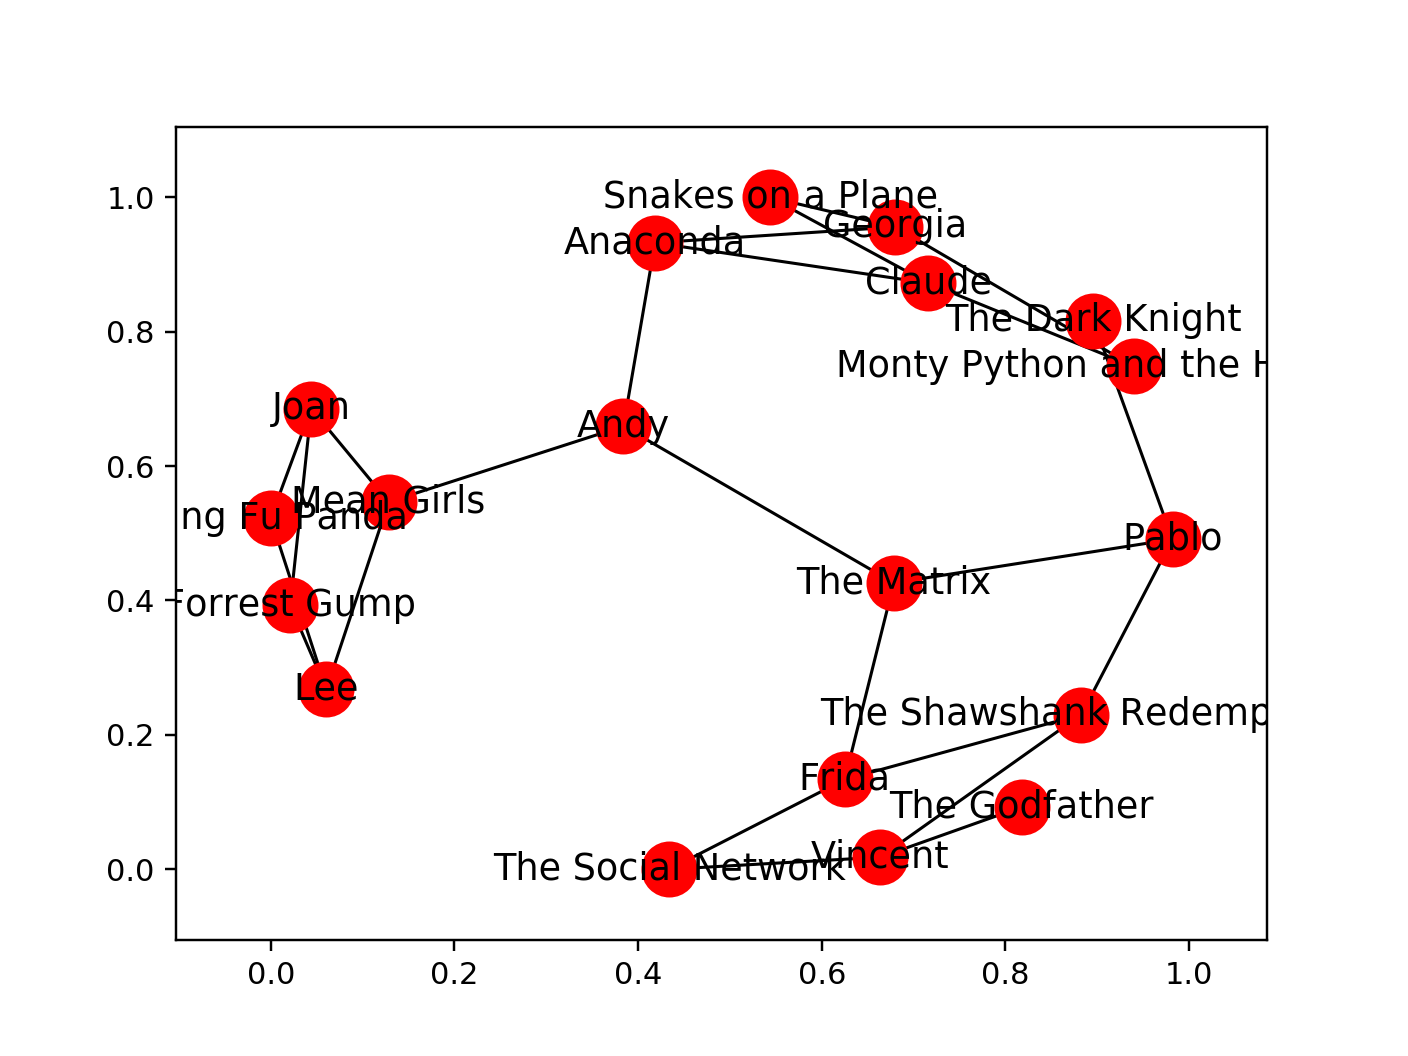

In [5]:
def answer_two():
    
    # Your Code Here
    B2 = answer_one()
    for node in B2.nodes():
        if node in employees:
            B2.add_node(node, type="employee")
        else:
            B2.add_node(node, type="movie")
    return B2 # Your Answer Here
# plot_graph(answer_two())

### Question 3

Find a weighted projection of the graph from `answer_two` which tells us how many movies different pairs of employees have in common.

*This function should return a weighted projected graph.*

<IPython.core.display.Javascript object>


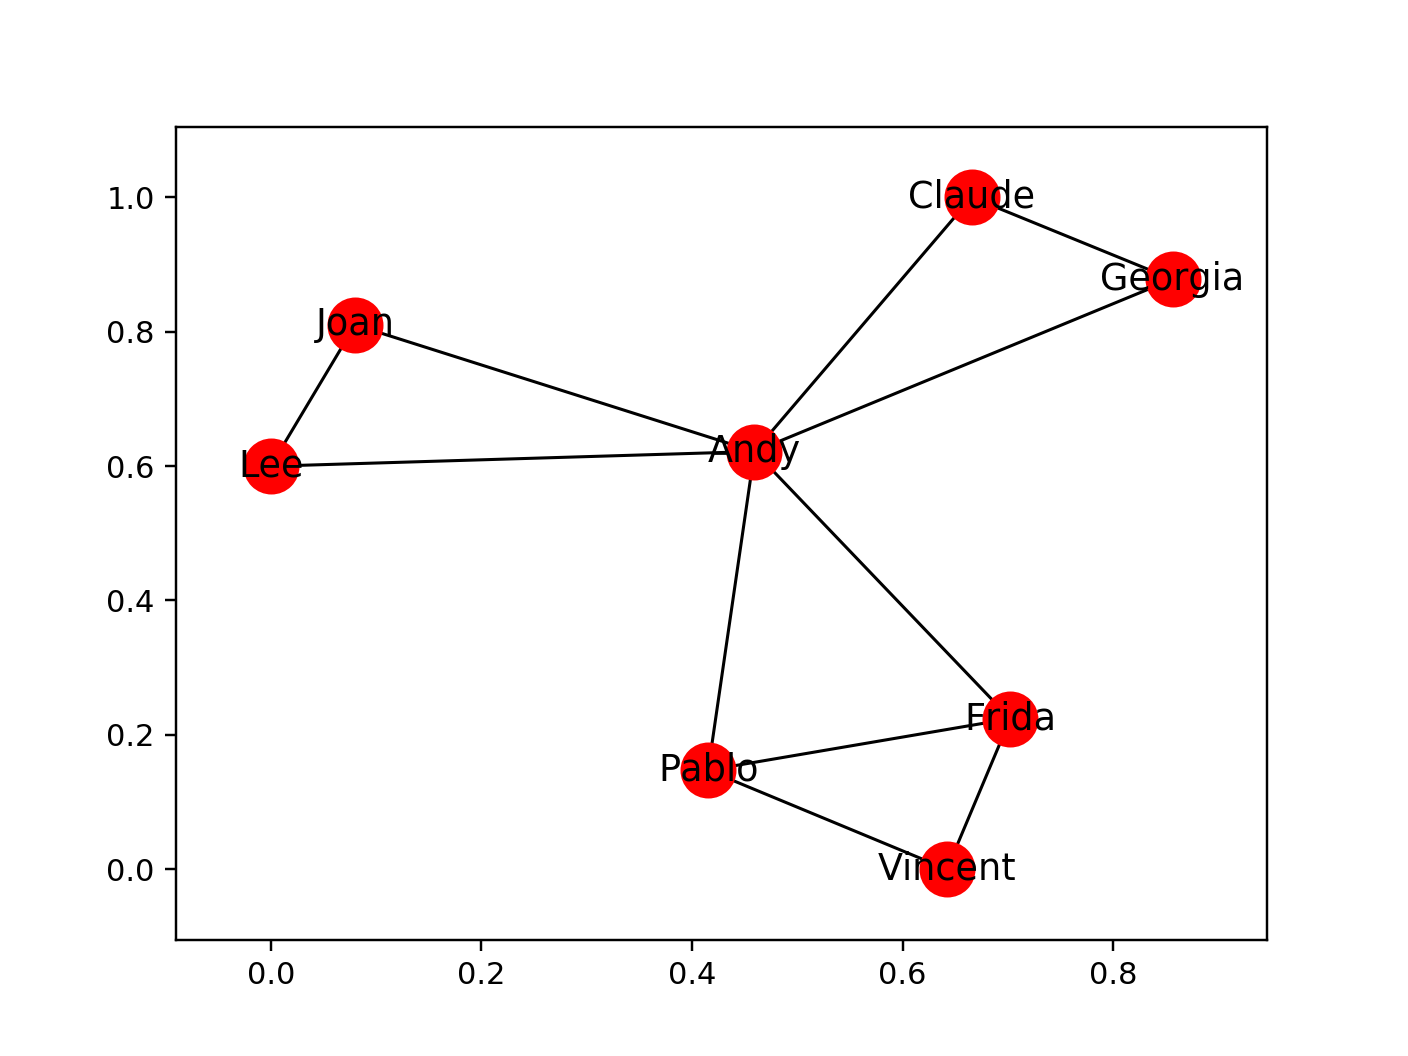

In [6]:
def answer_three():
        
    # Your Code Here
    B3 = answer_two()    
    B3 = bipartite.weighted_projected_graph(B3, employees)
    return B3 # Your Answer Here
# plot_graph(answer_three())

### Question 4

Suppose you'd like to find out if people that have a high relationship score also like the same types of movies.

Find the Pearson correlation ( using `DataFrame.corr()` ) between employee relationship scores and the number of movies they have in common. If two employees have no movies in common it should be treated as a 0, not a missing value, and should be included in the correlation calculation.

*This function should return a float.*

In [7]:
def answer_four():
        
    # Your Code Here
    
    # df_relations = pd.read_csv('Employee_Relationships.txt', delimiter = "\t", header=None)
    # df_relations.columns=['emp1', 'emp2', 'relations']

    # B4 = answer_three()
    # df_common = pd.DataFrame(B4.edges(data=True), columns=['emp1', 'emp2', 'movies_weight'])
    # df_common_dup = df_common
    # df_common_dup = df_common_dup.rename(columns={'emp1': 'emp2', 'emp2': 'emp1'})
    # df_common_final = pd.concat([df_common, df_common_dup])
    # print(df_common_final)

    # df_merged = pd.merge(df_relations, df_common, how='left')
    # print(df_merged)


    # Inspiration for below solution is from:
    # https://github.com/sambhipiyush/Applied-Social-Network-Analysis-in-Python-University-of-Michigan/blob/master/Module%201/Assignments/Assignment%2B1.ipynb
    B4 = answer_three()
    df_common = pd.DataFrame(B4.edges(data=True), columns=['emp1', 'emp2', 'movies_count'])
    df_common['movies_count'] = df_common['movies_count'].map(lambda x: x['weight'])
#     print(df_common)
    B4_copy = df_common.copy()
    B4_copy.rename(columns={'emp1': 'emp2', 'emp2': 'emp1'}, inplace=True)
#     print(B4_copy)
    B4_common_movies = pd.concat([df_common, B4_copy], ignore_index=True)

    B4_relations = pd.read_csv('Employee_Relationships.txt', sep='\t', 
                   header=None, names=['emp1', 'emp2', 'relations'])

    B4_merged = pd.merge(B4_relations, B4_common_movies, how='left')
    B4_merged['movies_count'].fillna(value=0, inplace=True)
#     print(B4_merged)
    corr_score = B4_merged['movies_count'].corr(B4_merged['relations'])
    
    return corr_score # Your Answer Here
# answer_four()

0.78839622217334737